In [ ]:
#unrar file
# !unrar x /content/src.rar

In [ ]:
# !pip install geopandas
# !pip install rasterio

#classification
# Installing required libraries of tf  and keras

# !pip install tensorflow==1.15.2
# !pip install tensorflow-gpu
# !pip install pysolar


ERROR: Could not find a version that satisfies the requirement vapry (from versions: none)
ERROR: No matching distribution found for vapry


In [ ]:
import sys
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import *
import os
import shutil

## Télchargement des images


### Via Bing satellite Maps

* bot_long bot_lat top_long top_lat: -4.024898 5.320004 -4.014984 5.330003

![](/content/pictures/image_2020-12-09_101650.png)


In [ ]:
cd /content/src/download_satellite_images/Bing-downloader

/content/src/download_satellite_images/Bing-downloader


In [ ]:
%run -i main.py  5.320004 -4.024898  5.330003 -4.014984

Selected levelOfDetail: 19
Downlaoded corner tiles.
Completed: 100.00% 


In [ ]:
ls Images 

seq_256282,254370.jpeg  seq_256287,254370.jpeg  seq_256292,254370.jpeg
seq_256282,254371.jpeg  seq_256287,254371.jpeg  seq_256292,254371.jpeg
seq_256282,254372.jpeg  seq_256287,254372.jpeg  seq_256292,254372.jpeg
seq_256282,254373.jpeg  seq_256287,254373.jpeg  seq_256292,254373.jpeg
seq_256282,254374.jpeg  seq_256287,254374.jpeg  seq_256292,254374.jpeg
seq_256282,254375.jpeg  seq_256287,254375.jpeg  seq_256292,254375.jpeg
seq_256282,254376.jpeg  seq_256287,254376.jpeg  seq_256292,254376.jpeg
seq_256282,254377.jpeg  seq_256287,254377.jpeg  seq_256292,254377.jpeg
seq_256282,254378.jpeg  seq_256287,254378.jpeg  seq_256292,254378.jpeg
seq_256282,254379.jpeg  seq_256287,254379.jpeg  seq_256292,254379.jpeg
seq_256282,254380.jpeg  seq_256287,254380.jpeg  seq_256292,254380.jpeg
seq_256282,254381.jpeg  seq_256287,254381.jpeg  seq_256292,254381.jpeg
seq_256282,254382.jpeg  seq_256287,254382.jpeg  seq_256292,254382.jpeg
seq_256282,254383.jpeg  seq_256287,254383.jpeg  seq_256292,254383.jpeg
seq_25

In [ ]:
%run -i stitchTiles.py

Pour visualiser l'image résultante

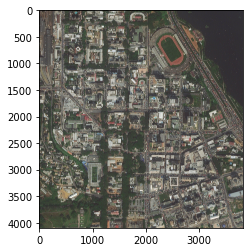

In [ ]:
plt.imshow(plt.imread("/content/src/download_satellite_images/Bing-downloader/ArielView_org.jpeg"))

### Via Google satellite Maps

* lon_start lat_stop lon_stop lat_start zoom-level: -4.024898 5.320004 -4.014984 5.330003

![](/content/pictures/image_2020-12-09_101650.png)


In [ ]:
cd /content/src/download_satellite_images/GoogleMaps-downloader

/content/src/download_satellite_images/GoogleMaps-downloader


In [ ]:
ls

download_tiles_for_py3.py  gmap_utils.pyc          README.markdown
download_tiles.py          merge_tiles_for_py3.py  tile_convert.py
gmap_utils.py              __pycache__/


In [ ]:
%run -i download_tiles_for_py3.py -4.024898 5.320004 -4.014984 5.330003 17

x range 64070 64074
y range 63592 63596
width: 1024
height: 1024
1 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64070_63592_s.jpg
download complete
2 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64070_63593_s.jpg
download complete
3 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64070_63594_s.jpg
download complete
4 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64070_63595_s.jpg
download complete
5 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64071_63592_s.jpg
download complete
6 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64071_63593_s.jpg
download complete
7 of 16 -- saving /content/src/download_satellite_images/GoogleMaps-downloader/2020-12-09_10-40-35/17_64071

<Figure size 432x288 with 0 Axes>

Afficher le résultat

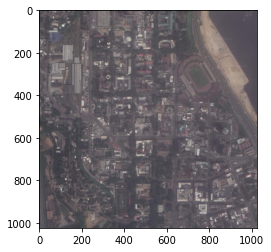

In [ ]:
plt.imshow(plt.imread("/content/src/download_satellite_images/GoogleMaps-downloader/map_s.jpg"))

## Traitements d'images

### Image clip

![](/content/pictures/image_2020-12-09_104737.png)

1. Avec une seule géometrie

* Les packages nécéssaires:

> `rasterio` 

> `geopandas`



In [ ]:
cd /content/src/Image-processing/image-clip

/content/src/Image-processing/image-clip


In [ ]:
ls

gdf.GeoJson  image_clip_gdf.py  image_clip.py  tmp.tif


Nous nous servirons de l'image suivantes `tmp.tif`

In [ ]:
tif_url = 'https://oin-hotosm.s3.amazonaws.com/5ea338e5c70abb0005869e8e/0/5ea338e5c70abb0005869e8f.tif'
!wget -O tmp.tif {tif_url}

Le crs de l'image est le suivant: 43630

In [ ]:
import rasterio as rio
rio.open('tmp.tif').meta['crs']

CRS.from_epsg(32630)

In [ ]:
%run -i image_clip.py tmp.tif gdf.GeoJson clip_tmp.tif

<Figure size 432x288 with 0 Axes>

Affichage du résultat

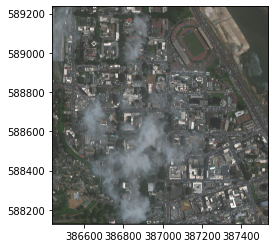

In [ ]:
show(rio.open("/content/src/Image-processing/image-clip/clip_tmp.tif"))


![](/content/pictures/image_2020-12-09_104737.png)

2. Avec une plusieurs géometrie

* Les packages nécéssaires:

> `rasterio`, `geopandas`, `sklearn`, `skimage`, `shapely`




In [ ]:
%run -i image_clip_gdf.py gdf_multiple.GeoJson tmp.tif tiles

0it [00:00, ?it/s]

Done


2it [00:01,  1.21it/s]


In [ ]:
flist = [os.path.join('tiles', f) for f in os.listdir('tiles/_042')]
flist

['tiles/042_1_.jpg', 'tiles/042_0_.jpg']

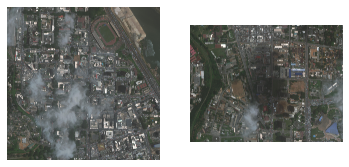

In [ ]:
plt.subplot(121),plt.axis('off'),plt.imshow(plt.imread('/content/src/Image-processing/image-clip/tiles/_042/042_0_.jpg'))
plt.subplot(122),plt.axis('off'),plt.imshow(plt.imread("/content/src/Image-processing/image-clip/tiles/_042/042_1_.jpg"))
plt.show()

### Image crop

* Les packages nécéssaire:

`opencv-python`, `rasterio`, `numpy` et `shapely`

In [ ]:
# shutil.copy("/content/src/Image-processing/image-clip/clip_tmp.tif", "/content/src/Image-processing/image-crop/clip_tmp.tif")

cd /content/src/Image-processing/image-crop

/content/src/Image-processing/image-crop


In [ ]:
ls

clip_tmp.tif  readme.rmd  split_raster.py


In [ ]:
%run -i split_raster.py clip_tmp.tif tiles/tiles 256

Done


Affichage de quelques morceaux

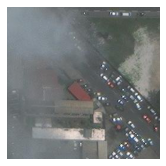

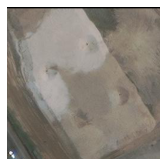

(<matplotlib.axes._subplots.AxesSubplot at 0x7f970a0d9128>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f970a0d9128>)

In [ ]:
plt.subplot(121),plt.axis('off'),show(rio.open("/content/src/Image-processing/image-crop/tiles/tiles_101.tif"))
plt.subplot(122),plt.axis('off'),show(rio.open("/content/src/Image-processing/image-crop/tiles/tiles_10.tif"))

### Merge tiles

In [ ]:
cd /content/src/Image-processing/merge-raster-images

/content/src/Image-processing/merge-raster-images


In [ ]:
ls

merge_raster.py  readme.rmd


In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/Image-processing/merge-raster-images/tiles

In [ ]:
%run -i merge_raster.py tiles clip_tmp.tif

Affichage du résultat

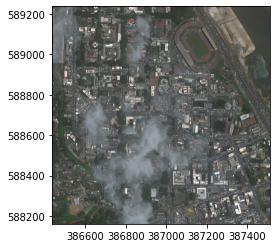

In [ ]:
show(rio.open('/content/src/Image-processing/merge-raster-images/clip_tmp.tif'))

### Canny edges detection


* Nécéssite:

`opencv-python`

In [ ]:
cd /content/src/Image-processing/canny

/content/src/Image-processing/canny


In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/Image-processing/canny/tiles

In [ ]:
%run -i canny_methd.py tiles tiles_res tiles_res_img

Affichage de  quelques résultats

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9709d6f0b8>)

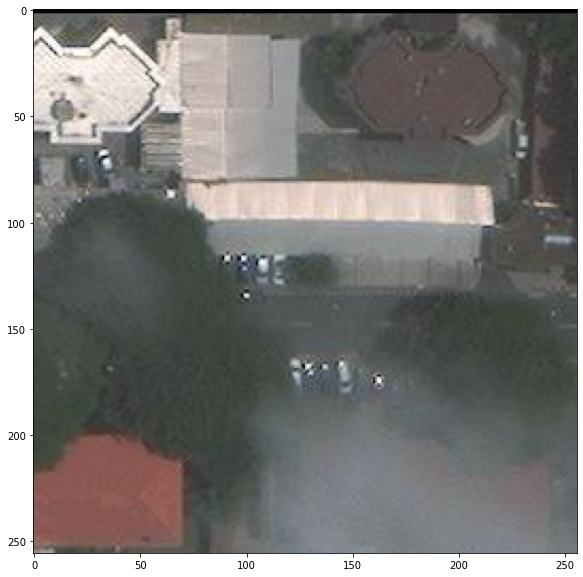

In [ ]:
plt.figure(figsize=(10,10)),plt.imshow(plt.imread("/content/src/Image-processing/canny/tiles/tiles_5.tif"))

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9709e2add8>)

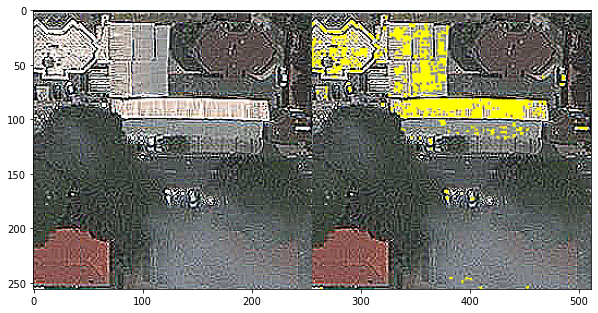

In [ ]:
plt.figure(figsize=(10,10)),plt.imshow(plt.imread("/content/src/Image-processing/canny/tiles_res_img/tiles_5.tif"))

### Watershed

In [ ]:
cd /content/src/Image-processing/watershed_meanshift

/content/src/Image-processing/watershed_meanshift


In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/Image-processing/watershed_meanshift/tiles

In [ ]:
%run -i meanshift.py tiles

Done
Done
[INFO] 8 unique segments found
Completed: 0.51% [INFO] 15 unique segments found
Completed: 1.02% [INFO] 15 unique segments found
Completed: 1.53% [INFO] 16 unique segments found
Completed: 2.04% [INFO] 18 unique segments found
Completed: 2.55% [INFO] 12 unique segments found
Completed: 3.06% [INFO] 7 unique segments found
Completed: 3.57% [INFO] 19 unique segments found
Completed: 4.08% [INFO] 2 unique segments found
Completed: 4.59% [INFO] 18 unique segments found
Completed: 5.10% [INFO] 17 unique segments found
Completed: 5.61% [INFO] 10 unique segments found
Completed: 6.12% [INFO] 10 unique segments found
Completed: 6.63% [INFO] 7 unique segments found
Completed: 7.14% [INFO] 18 unique segments found
Completed: 7.65% [INFO] 11 unique segments found
Completed: 8.16% [INFO] 3 unique segments found
Completed: 8.67% [INFO] 13 unique segments found
Completed: 9.18% [INFO] 13 unique segments found
Completed: 9.69% [INFO] 10 unique segments found
Completed: 10.20% [INFO] 9 uniqu

Affichage des résultats

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f96fba90e10>)

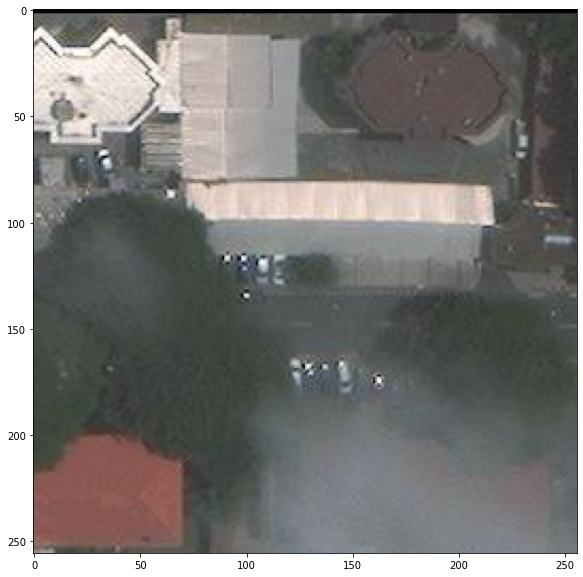

In [ ]:
plt.figure(figsize=(10,10)),plt.imshow(plt.imread("/content/src/Image-processing/watershed_meanshift/tiles/tiles_5.tif"))

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f96fba49320>)

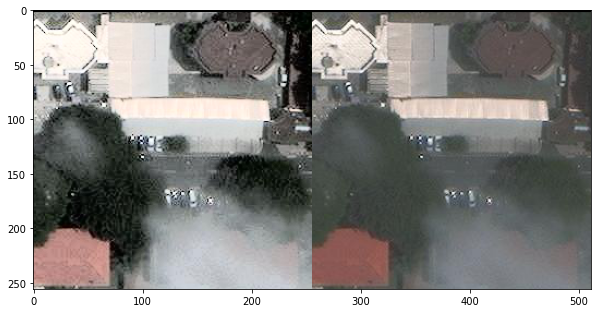

In [ ]:
plt.figure(figsize=(10,10)),plt.imshow(plt.imread("/content/src/Image-processing/watershed_meanshift/tiles_res_img/tiles_5.tif"))

### Image to plygon

## Models

In [ ]:
cd /content/src/models/classification/buildingNoBuilding

/content/src/models/classification/buildingNoBuilding


In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/models/classification/buildingNoBuilding/tiles

In [ ]:
ls

buildingnobuilding.py  images/  models/  tiles/


In [ ]:
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [ ]:
%run -i buildingnobuilding.py tiles ".tif"

No GPU found
Done
Done
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


InvalidArgumentError: ignored

## Segmentation

In [ ]:
cd /content/src/models/segmentation/fastai

/content/src/models/segmentation/fastai


In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/models/segmentation/fastai/tiles

In [ ]:
 !gsutil cp -R "/content/drive/My Drive/Colab Notebooks/Intership_Files/projects_files/models/model_final/models" "/content/src/models/segmentation/fastai"

Copying file:///content/drive/My Drive/Colab Notebooks/Intership_Files/projects_files/models/model_final/models/tmp.pth...
Copying file:///content/drive/My Drive/Colab Notebooks/Intership_Files/projects_files/models/model_final/models/BinarySegm-focaldice-stage1-best.pkl...
Copying file:///content/drive/My Drive/Colab Notebooks/Intership_Files/projects_files/models/model_final/models/BinarySegm-focaldice-stage1-best.pth...
|
Operation completed over 3 objects/705.1 MiB.                                    


In [ ]:
%run -i inference_to_images.py tiles results

Done
Completed: 100.00% 

Affichage

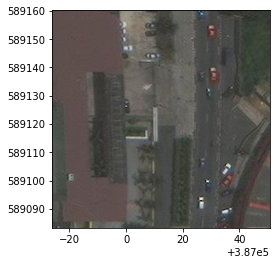

In [ ]:
show(rio.open('/content/src/models/segmentation/fastai/tiles/tiles_21.tif'))

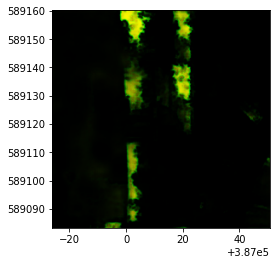

In [ ]:
show(rio.open('/content/src/models/segmentation/fastai/results/tiles_21.tif'))

* To geojson

In [ ]:
%run -i inference_to_geojson.py tiles results2

In [ ]:
# !zip -r src_w.zip src
# !zip -r pictures.zip pictures

In [ ]:
# !gsutil cp /content/src_w.zip  "/content/drive/MyDrive/Colab Notebooks/Intership_Files/projects_files/notebooks/working"
# !gsutil cp /content/pictures.zip  "/content/drive/MyDrive/Colab Notebooks/Intership_Files/projects_files/notebooks/working"

for colab command have a look at : [lien](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)

## Estimation

### Azimuth

* Nécésste `pysolar`

In [ ]:
cd /content/src/Estimation

/content/src/Estimation


In [ ]:
%run -i azimuth_estimation.py "-3.9837119579315186" "5.301122665405273" "2008-01-01 08:00:00" "2008-01-01 18:00:00" "2.5" "18" az_df.csv


### height estiamtion

In [ ]:
!cp -R /content/src/Image-processing/image-crop/tiles /content/src/Estimation/tiles

In [ ]:
%run -i height_estimation.py tiles ".tif" "178.3282145189649"

Done
Done
Completed: 100.00% 

In [ ]:
!pip freeze > requirements.txt